In [1]:
# import base libraries
import numpy as np
import pandas as pd
import sqlalchemy as sa
from sqlalchemy import create_engine

In [3]:
# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [84]:
#Database credentials

Username = 'admin'
Password = 'amazing_people'
Host = 'alphacode-explore.ccwgqdqrrmvt.eu-west-1.rds.amazonaws.com'
Port = '1433'
Database = 'Sicelo'

In [85]:
#Create the connection

connection = create_engine(
    'mssql+pymssql://' +
    Username + ':' + Password + '@' + Host + ':' + Port + '/' + Database)

In [86]:
#query database

sql_query = "Select * from claims_data"

In [88]:
#creating a dataframe

df_claims = pd.read_sql_query(sql_query, connection)

In [89]:
df_claims.head(5)

,age,sex,bmi,steps,children,smoker,region,insurance_claim,claim_amount
0,19,female,27.9,3009,0,yes,southwest,yes,16884.924
1,18,male,33.77,3008,1,no,southeast,yes,1725.5523
2,28,male,33,3009,3,no,southeast,no,0
3,33,male,22.705,10009,0,no,northwest,no,0
4,32,male,28.88,8010,0,no,northwest,yes,3866.8552


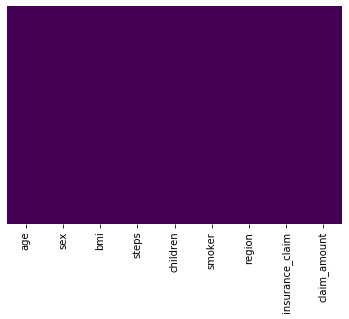

In [18]:
#Checking for null values
sn.heatmap(df_claims.isnull(), yticklabels=False, cbar=False,cmap='viridis')

In [90]:
#drop unnecessary data
df_claims.drop('claim_amount',axis=1,inplace=True)

In [91]:
df_claims.head()

,age,sex,bmi,steps,children,smoker,region,insurance_claim
0,19,female,27.9,3009,0,yes,southwest,yes
1,18,male,33.77,3008,1,no,southeast,yes
2,28,male,33,3009,3,no,southeast,no
3,33,male,22.705,10009,0,no,northwest,no
4,32,male,28.88,8010,0,no,northwest,yes


In [92]:
#Create outcome and features
y=df_claims['insurance_claim']
x=df_claims.drop('insurance_claim', axis=1)

In [93]:
df_claims.head()

,age,sex,bmi,steps,children,smoker,region,insurance_claim
0,19,female,27.9,3009,0,yes,southwest,yes
1,18,male,33.77,3008,1,no,southeast,yes
2,28,male,33,3009,3,no,southeast,no
3,33,male,22.705,10009,0,no,northwest,no
4,32,male,28.88,8010,0,no,northwest,yes


In [94]:
x_1 = pd.get_dummies(x,columns=['smoker','sex', 'region'], drop_first=True)

In [95]:
#import train_test_split to create train sample

from sklearn.model_selection import train_test_split

In [96]:
#Splitting the data

X_train, X_test, y_train, y_test = train_test_split(x_1, y, test_size=0.2, random_state=42)

In [97]:
#import the regression models

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [99]:
#Train the models

logmodel=LogisticRegression()
logmodel.fit(X_train, y_train)

logtree=DecisionTreeClassifier()
logtree.fit(X_train,y_train)

logran=RandomForestClassifier()
logran.fit(X_train,y_train)

logscaler=StandardScaler()
x_scaled = logscaler.fit_transform(x_1)
x_standard = pd.DataFrame(x_scaled,columns=x_1.columns)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

svc=SVC(random_state=23)
svc.fit(X_train, y_train)

C:\Users\Sicelo Mpofana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sicelo Mpofana\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Sicelo Mpofana\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=23,
    shrinking=True, tol=0.001, verbose=False)

In [100]:
#Making Predictions

log_pred=logmodel.predict(X_test)
knn_pred=knn.predict(X_test)
tree_pred=logtree.predict(X_test)
forest_pred=logran.predict(X_test)
svc_preds=svc.predict(X_test)

In [101]:
#Import testing libraries

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

labels = ['No', 'Yes']

In [102]:
#Logisticregression Test
print('Logistic Regression Confusion Matrix')
pd.DataFrame(data=confusion_matrix(y_test, log_pred), index=labels, columns=labels)

Logistic Regression Confusion Matrix


,No,Yes
No,87,20
Yes,15,146


In [103]:
#KNN Test
print('KNN Confusion Matrix')
pd.DataFrame(data=confusion_matrix(y_test, knn_pred), index=labels, columns=labels)

KNN Confusion Matrix


,No,Yes
No,63,44
Yes,23,138


In [104]:
#Decision Tree Test
print('Decision Confusion Matrix')
pd.DataFrame(data=confusion_matrix(y_test, tree_pred), index=labels, columns=labels)

Decision Confusion Matrix


,No,Yes
No,104,3
Yes,2,159


In [105]:
#SVC Test
print('SVC Confusion Matrix')
pd.DataFrame(data=confusion_matrix(y_test, svc_preds), index=labels, columns=labels)

SVC Confusion Matrix


,No,Yes
No,62,45
Yes,16,145


In [106]:
#Forest Test
print('SVC Confusion Matrix')
pd.DataFrame(data=confusion_matrix(y_test, forest_pred), index=labels, columns=labels)

SVC Confusion Matrix


,No,Yes
No,104,3
Yes,7,154


In [107]:
#Logistic Regression

print('Classification Report')
print(classification_report(y_test, log_pred, target_names=['No', 'Yes']))

Classification Report
              precision    recall  f1-score   support

          No       0.85      0.81      0.83       107
         Yes       0.88      0.91      0.89       161

    accuracy                           0.87       268
   macro avg       0.87      0.86      0.86       268
weighted avg       0.87      0.87      0.87       268



In [108]:
#KNN Regression

print('KNN Classification Report')
print(classification_report(y_test, knn_pred, target_names=['No', 'Yes']))

KNN Classification Report
              precision    recall  f1-score   support

          No       0.73      0.59      0.65       107
         Yes       0.76      0.86      0.80       161

    accuracy                           0.75       268
   macro avg       0.75      0.72      0.73       268
weighted avg       0.75      0.75      0.74       268



In [109]:
#Tree Regression

print('Decision Tree Classification Report')
print(classification_report(y_test, tree_pred, target_names=['No', 'Yes']))

Decision Tree Classification Report
              precision    recall  f1-score   support

          No       0.98      0.97      0.98       107
         Yes       0.98      0.99      0.98       161

    accuracy                           0.98       268
   macro avg       0.98      0.98      0.98       268
weighted avg       0.98      0.98      0.98       268



In [110]:
#Forest Regression

print('Random Forest Classification Report')
print(classification_report(y_test, forest_pred, target_names=['No', 'Yes']))

Random Forest Classification Report
              precision    recall  f1-score   support

          No       0.94      0.97      0.95       107
         Yes       0.98      0.96      0.97       161

    accuracy                           0.96       268
   macro avg       0.96      0.96      0.96       268
weighted avg       0.96      0.96      0.96       268



In [111]:
#SVC Regression

print('SVC Classification Report')
print(classification_report(y_test, svc_preds, target_names=['No', 'Yes']))

SVC Classification Report
              precision    recall  f1-score   support

          No       0.79      0.58      0.67       107
         Yes       0.76      0.90      0.83       161

    accuracy                           0.77       268
   macro avg       0.78      0.74      0.75       268
weighted avg       0.78      0.77      0.76       268



The decision tree has the highest f1 score.

# TUNING

In [112]:
#KNN tuning

knn_4 = KNeighborsClassifier(n_neighbors=4)
knn_8 = KNeighborsClassifier(n_neighbors=8)
knn_23 = KNeighborsClassifier(n_neighbors=23)
knn_30 = KNeighborsClassifier(n_neighbors=30)

knn_4.fit(X_train, y_train)
knn_8.fit(X_train, y_train)
knn_23.fit(X_train, y_train)
knn_30.fit(X_train, y_train)

pred_knn_4 = knn_4.predict(X_test)
pred_knn_8 = knn_8.predict(X_test)
pred_knn_23 = knn_23.predict(X_test)
pred_knn_30=knn_30.predict(X_test)

In [113]:
labels = ['No', 'Yes']

pred = {'k=4':pred_knn_4, 'k=5':pred_knn_8, 'k=20':pred_knn_23, 'k=30':pred_knn_30}

for k,v in pred.items():
    print('{}'.format(k))
    print(pd.DataFrame(data=confusion_matrix(y_test, v), index=labels, columns=labels))
    print('\n')
    

for k,v in pred.items():
    print('{}'.format(k))
    print(classification_report(y_test, v, target_names=['No', 'Yes']))
    print('\n')

k=4
     No  Yes
No   85   22
Yes  38  123


k=5
     No  Yes
No   71   36
Yes  29  132


k=20
     No  Yes
No   57   50
Yes  21  140


k=30
     No  Yes
No   54   53
Yes  26  135


k=4
              precision    recall  f1-score   support

          No       0.69      0.79      0.74       107
         Yes       0.85      0.76      0.80       161

    accuracy                           0.78       268
   macro avg       0.77      0.78      0.77       268
weighted avg       0.79      0.78      0.78       268



k=5
              precision    recall  f1-score   support

          No       0.71      0.66      0.69       107
         Yes       0.79      0.82      0.80       161

    accuracy                           0.76       268
   macro avg       0.75      0.74      0.74       268
weighted avg       0.76      0.76      0.76       268



k=20
              precision    recall  f1-score   support

          No       0.73      0.53      0.62       107
         Yes       0.74      0.87     

In [114]:
#Random Forest Tuning

forest_1 = RandomForestClassifier(n_estimators=50, random_state=23)
forest_2 = RandomForestClassifier(n_estimators=120, random_state=23)
forest_3 = RandomForestClassifier(n_estimators=200, random_state=23)

forest_1.fit(X_train, y_train)
forest_2.fit(X_train, y_train)
forest_3.fit(X_train, y_train)

pred_forest_1 = forest_1.predict(X_test)
pred_forest_2 = forest_2.predict(X_test)
pred_forest_3 = forest_3.predict(X_test)

pred = {'trees = 50':pred_forest_1, 
        'trees = 120':pred_forest_2, 
        'trees = 200':pred_forest_3}

for k,v in pred.items():
    print('{}'.format(k))
    print(classification_report(y_test, v, target_names=['No', 'Yes']))
    print('\n')

trees = 50
              precision    recall  f1-score   support

          No       0.93      0.98      0.95       107
         Yes       0.99      0.95      0.97       161

    accuracy                           0.96       268
   macro avg       0.96      0.97      0.96       268
weighted avg       0.96      0.96      0.96       268



trees = 120
              precision    recall  f1-score   support

          No       0.94      0.97      0.95       107
         Yes       0.98      0.96      0.97       161

    accuracy                           0.96       268
   macro avg       0.96      0.96      0.96       268
weighted avg       0.96      0.96      0.96       268



trees = 200
              precision    recall  f1-score   support

          No       0.95      0.97      0.96       107
         Yes       0.98      0.97      0.97       161

    accuracy                           0.97       268
   macro avg       0.97      0.97      0.97       268
weighted avg       0.97      0.97  

# Test data

In [115]:
Username = 'admin'
Password = 'amazing_people'
Host = 'alphacode-explore.ccwgqdqrrmvt.eu-west-1.rds.amazonaws.com'
Port = '1433'
Database = 'Sicelo'

connection = create_engine(
    'mssql+pymssql://' +
    Username + ':' + Password + '@' + Host + ':' + Port + '/' + Database)

In [116]:
sql_query = "Select * from med_test"
df_claims_test = pd.read_sql_query(sql_query, connection)
df_claims_test['bmi']=df_claims_test['bmi'].apply(lambda x: pd.to_numeric(x))
df_claims_test.head()

,row_id,age,sex,bmi,steps,children,smoker,region
0,1,27,male,28.880,8049,0,False,southwest
1,2,20,female,26.265,7970,3,True,southwest
2,3,32,female,26.025,2973,0,False,southwest
3,4,19,female,22.085,10427,1,True,southwest
4,5,20,female,28.685,3972,0,True,southwest


C:\Users\Sicelo Mpofana\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Sicelo Mpofana\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


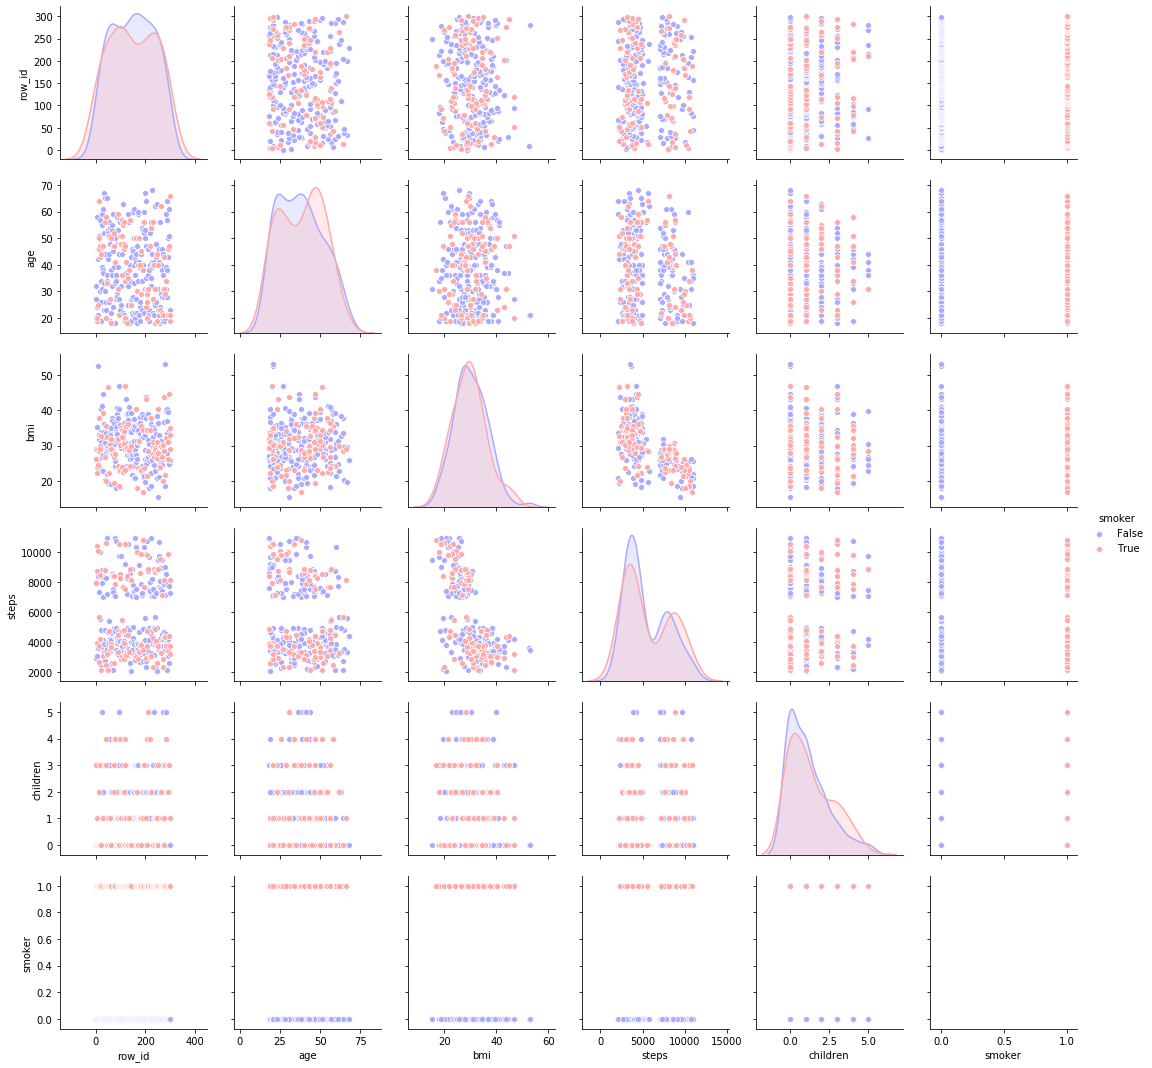

In [132]:
sn.pairplot(df_claims_test,hue='smoker',palette='bwr')

In [117]:
x=df_claims_test.drop('row_id', axis=1)
x_1 = pd.get_dummies(x, columns=['smoker','sex', 'region'], drop_first=True)
x_1.head()

,age,bmi,steps,children,smoker_True,sex_male,region_northwest,region_southeast,region_southwest
0,27,28.880,8049,0,0,1,0,0,1
1,20,26.265,7970,3,1,0,0,0,1
2,32,26.025,2973,0,0,0,0,0,1
3,19,22.085,10427,1,1,0,0,0,1
4,20,28.685,3972,0,1,0,0,0,1


In [125]:
actual_claim=logtree.predict(x_1)

In [128]:
results=pd.DataFrame({'row_id' : df_claims_test.row_id,'predictions' : actual_claim.ravel()})

In [129]:
results.head()

,row_id,predictions
0,1,yes
1,2,no
2,3,yes
3,4,yes
4,5,yes


In [130]:
results.to_sql('claim_classification_model_results', con=connection, if_exists='append', index=False,method='multi',chunksize=500)

In [131]:
len(results)

300